# Demo/Examples of Supervised Deep Learning for SRVF Distances


In [ ]:
import tensorflow as tf;
tf.config.experimental.set_visible_devices([], 'GPU')
import keras;
import numpy as np;
from keras.models import Sequential,Model,load_model
from keras.layers import *
import keras.backend as K
import matplotlib.pyplot as plt
import scipy.io as sio


from DLsrvf import CyclicPad, defineModel, trainModelwSPDA, trainAndValidateModelwSPDA,  randomCurveFromShapeClass, getShapeClass

First we need to define some relevant values about the data we wish to train and test our network on. We will use a synthetic dataset consisting of open, $\mathbb{R}^1$-valued functions discretized at 90 points. Next we define relevant variables for the training process.

In [ ]:
length=90        #how many data points per curve
dim=1            #dimension of the curve set to 1 for now
closed=False     #whether or not the curves are closed
epoch=500            #epochs to train
trainsize=10000; #batch size for training 
reparamn=10;     #number of samples to pull from the shape class during Shape Preserving Data Analysis

Now we can import our dataset.

In [ ]:
dataf=sio.loadmat("Data/Synthetic18~6.mat")  #Load data

tData = dataf['tData']                  #Separate data into training (tr) and test (t) data
otrData = dataf['otrData']
tLabels = dataf['tLabels']  
otrLabels = dataf['otrLabels']


tData1=tData[:,:,0:dim]
tData2=tData[:,:,dim:2*dim]

Next use our functions to define a Keras model and train it according to the parameters defined above. 

In [ ]:
model = defineModel(90,1,False)
model, trainMSE, testMSE=trainAndValidateModelwSPDA(model,length,dim,closed,otrData,otrLabels,tData,tLabels,epoch,trainsize)

The function *trainModelAndValidatewSPDA*  also returns two numpy arrays containing the mean squared error after each epoch of training for both the training data and testing/validation data. We plotted the both of these errors from our training below.

|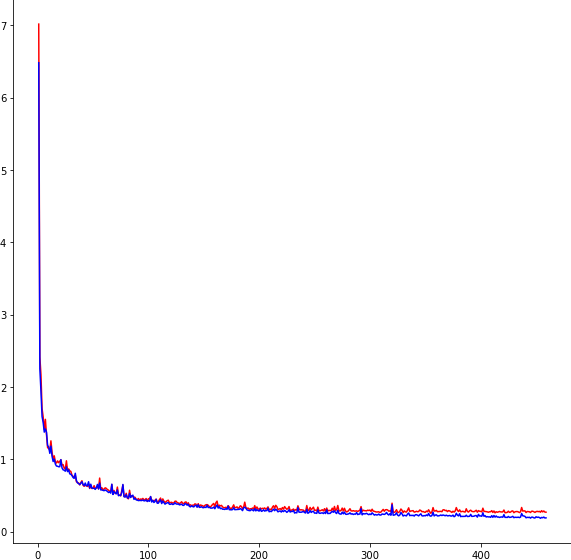|
|:--:| 
| *Mean Squared Error of the network on training data (blue) and testing data (red)* |
| *The x-axis represents the number of training iterations* |

Another function to highlight is *randomCurveFromShapeClass* as they are essential for our shape preserving data augmentation step. First we will load in a closed 2d curve.  discretized at 100 points.

In [ ]:
length=100
dim=2
closed=True

curvef=sio.loadmat("Data/2DCurve.mat") 
f=curvef['curve']

plt.figure(figsize=(5, 5))
plt.axes(label="ax").set_aspect('equal', 'datalim')
plt.plot(f[:,0],f[:,1])
plt.scatter(f[:,0],f[:,1],c=np.arange(0,length))
plt.set_cmap('hsv')
plt.show()

Using randomCurveFromShapeClass we can create any number of unique curves with the same shape as our original curve.

In [ ]:
for i in range(0,4):
    plt.figure(figsize=(5, 5))
    f1=randomCurveFromShapeClass(f,length,dim, closed)
    plt.axes(label="ax").set_aspect('equal', 'datalim')
    plt.plot(f1[:,0],f1[:,1])
    plt.scatter(f1[:,0],f1[:,1],c=np.arange(0,length))
    plt.set_cmap('hsv')
    plt.show()

Finally for any of our main functions you can use *help(funtion_name)* to learn about the parameters of the functions and what the functions return. For example,

In [ ]:
help(getShapeClass)